In [1]:
import pandas as pd 

red_wine = pd.read_csv('/home/dev_ws/ML/data/winequality-red.csv', sep = ';')
white_wine = pd.read_csv('/home/dev_ws/ML/data/winequality-white.csv', sep = ';')

/tmp/ipykernel_46284/1322628071.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 710.6 KB


In [6]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [7]:
import plotly.express as px 

fig = px.histogram(wine, x = "quality")
fig.show()

In [8]:
fig = px.histogram(wine , x = "quality", color = "color")
fig.show()

/home/kkyu/venv/machine_venv/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### 라벨 분리

In [9]:
X = wine.drop(['color'], axis = 1)
y = wine['color']

### 데이터를 훈련용과 테스트용으로 나눠주자

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13)

np.unique(y_train, return_counts=True)

(array([0., 1.]), array([3913, 1284]))

### 훈련용과 테스트용 레드/화이트 와인에 따라 어느정도 구분되었는지

In [11]:
import plotly.graph_objects as go 

fig = go.Figure()
fig.add_trace(go.Histogram(x = X_train['quality'], name = 'Train'))
fig.add_trace(go.Histogram(x = X_test['quality'], name = 'Test'))

fig.update_layout(barmode = 'overlay')
fig.update_traces(opacity = 0.75)
fig.show()

### 결정나무 훈련

In [12]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

### 학습 결과

In [13]:
from sklearn.metrics import accuracy_score

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9553588608812776
Test Acc :  0.9569230769230769


### 와인 데이터의 몇 개 항목의 Boxplot 그리기

In [14]:
fig = go.Figure()
fig.add_trace(go.Box(y = X['fixed acidity'], name = 'fixed acidity'))
fig.add_trace(go.Box(y = X['chlorides'], name = 'chlorides'))
fig.add_trace(go.Box(y = X['quality'], name = 'quality'))

fig.show()

## 데이터 전처리
### MinMaxScalar , StandardScalar

- 컬러들의 최대/최소 범위가 각각 다르고, 평균과 분산이 각각 다르다
- 특성(feature)의 편향 문제는 최적의 모델을 찾는데 방해가 될 수도 있다

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler()
SS = StandardScaler()

SS.fit(X)
MMS.fit(X)

X_ss = SS.transform(X)
X_mms = MMS.transform(X)


In [16]:
X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)
X_mms_pd = pd.DataFrame(X_mms, columns=X.columns)

### MinMaxScalar

In [17]:
fig = go.Figure()
fig.add_trace(go.Box(y = X_mms_pd['fixed acidity'], name = 'fixed acidity'))
fig.add_trace(go.Box(y = X_mms_pd['chlorides'], name = 'chlorides'))
fig.add_trace(go.Box(y = X_mms_pd['quality'], name = 'quality'))

fig.show()

### StandardScalar

In [18]:
fig = go.Figure()
fig.add_trace(go.Box(y = X_ss_pd['fixed acidity'], name = 'fixed acidity'))
fig.add_trace(go.Box(y = X_ss_pd['chlorides'], name = 'chlorides'))
fig.add_trace(go.Box(y = X_ss_pd['quality'], name = 'quality'))

fig.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_mms_pd, y, test_size=0.2,
                                                    random_state=13)
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9553588608812776
Test Acc :  0.9569230769230769


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_ss_pd, y, test_size=0.2,
                                                    random_state=13)
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9553588608812776
Test Acc :  0.9569230769230769


### 결정나무 시선에서 보는 화이트와인과 레드와인 구분

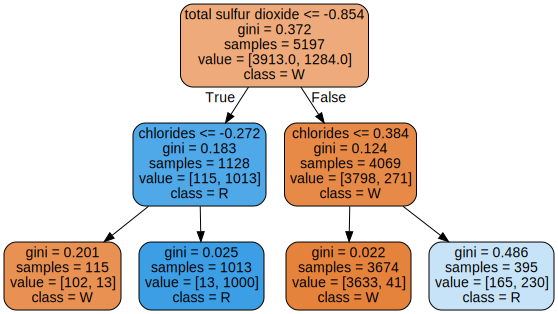

In [21]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(wine_tree, feature_names=X_train.columns,
                       class_names=['W', 'R'],
                       rounded=True, filled = True))

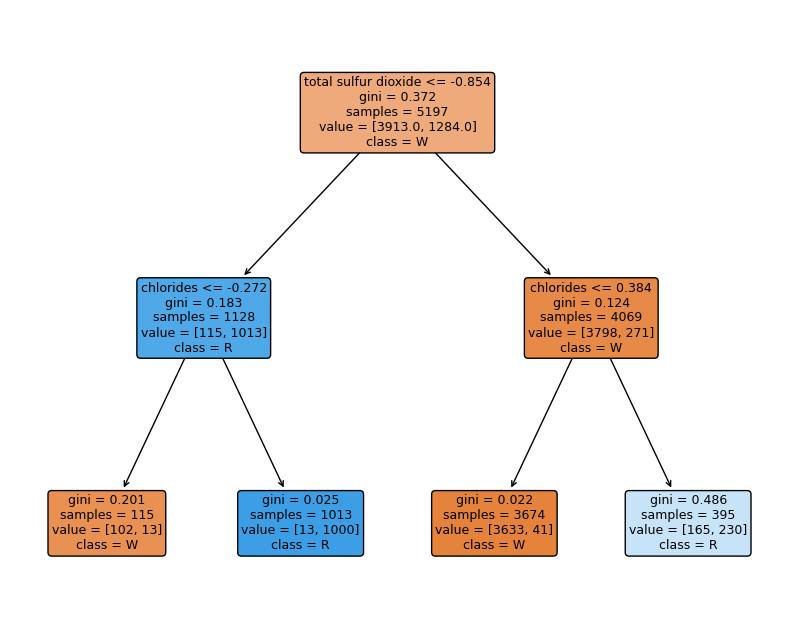

In [22]:
import matplotlib.pyplot as plt 
from sklearn import tree 

fig = plt.figure(figsize = (10,8))
_= tree.plot_tree(wine_tree,
                   feature_names= X_train.columns,
                   class_names = ['W','R'],
                   rounded=True, filled = True)

### MaxDepth를 높이면 저 수치에도 변화가 온다

- 레드와인과 화이트와인을 구분하는 중요 특성?

In [23]:
dict(zip(X_train.columns, wine_tree.feature_importances_))

{'fixed acidity': 0.0,
 'volatile acidity': 0.0,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.24230360549660776,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.7576963945033922,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.0,
 'quality': 0.0}

In [24]:
list1 = X_train.columns
list2 = wine_tree.feature_importances_

pairs = [pair for pair in zip(list1, list2)]
pairs

[('fixed acidity', 0.0),
 ('volatile acidity', 0.0),
 ('citric acid', 0.0),
 ('residual sugar', 0.0),
 ('chlorides', 0.24230360549660776),
 ('free sulfur dioxide', 0.0),
 ('total sulfur dioxide', 0.7576963945033922),
 ('density', 0.0),
 ('pH', 0.0),
 ('sulphates', 0.0),
 ('alcohol', 0.0),
 ('quality', 0.0)]

In [25]:
dict(pairs)

{'fixed acidity': 0.0,
 'volatile acidity': 0.0,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.24230360549660776,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.7576963945033922,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.0,
 'quality': 0.0}

In [26]:
dict(zip(list1, list2))

{'fixed acidity': 0.0,
 'volatile acidity': 0.0,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.24230360549660776,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.7576963945033922,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.0,
 'quality': 0.0}

In [27]:
a, b  = zip(*pairs)

print(list(a))
print(list(b))

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
[0.0, 0.0, 0.0, 0.0, 0.24230360549660776, 0.0, 0.7576963945033922, 0.0, 0.0, 0.0, 0.0, 0.0]


### 이진 분류 

- 와인 맛에 대한 분류
- quality 컬럼을 이진화

In [28]:
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
 13  taste                 6497 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 761.4 KB


In [29]:
X = wine.drop(['taste', 'quality'], axis = 1)
y = wine['taste']

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                     random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [30]:
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.7294593034442948
Test Acc :  0.7161538461538461


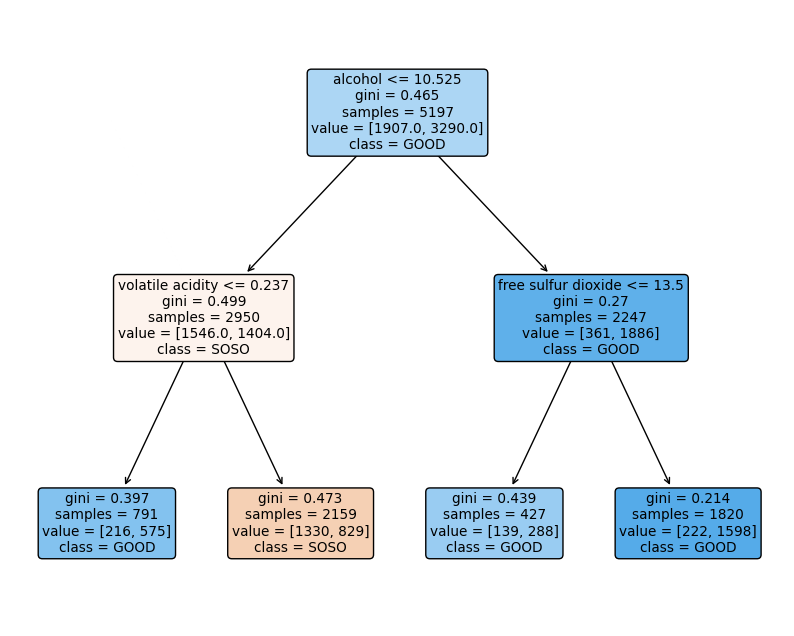

In [31]:
import matplotlib.pyplot as plt 
from sklearn import tree 

fig = plt.figure(figsize = (10,8))
_= tree.plot_tree(wine_tree,
                   feature_names= X_train.columns,
                   class_names = ['SOSO','GOOD'],
                   rounded=True, filled = True)